In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfinv

In [66]:
def F(x,mu=0.5,sig=0.2):
    return 0.5*(1.+erf((x-mu)/(sig*np.sqrt(2.))))

def Finv(u,mu=0.5,sig=0.2):
    return mu + sig*np.sqrt(2.)*erfinv(2.*u-1.)

In [121]:
x = np.linspace(-10,10,10000)

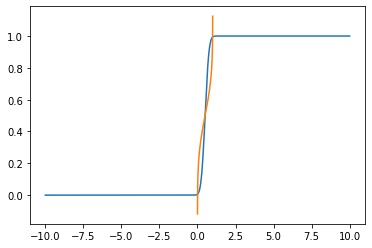

In [122]:
plt.plot(x,F(x))
plt.plot(x,Finv(x))

In [123]:
randx = np.random.random(10000)
randy = Finv(randx,sig=0.1,mu=0.4)
#print(randx)
#print(randy)

(array([8.000e+00, 2.000e+01, 6.200e+01, 1.520e+02, 3.060e+02, 5.710e+02,
        8.870e+02, 1.278e+03, 1.485e+03, 1.573e+03, 1.344e+03, 1.016e+03,
        6.450e+02, 3.480e+02, 1.760e+02, 7.700e+01, 3.600e+01, 1.400e+01,
        1.000e+00, 1.000e+00]),
 array([0.04066357, 0.07995778, 0.119252  , 0.15854621, 0.19784042,
        0.23713463, 0.27642884, 0.31572305, 0.35501726, 0.39431147,
        0.43360568, 0.47289989, 0.5121941 , 0.55148831, 0.59078252,
        0.63007673, 0.66937094, 0.70866516, 0.74795937, 0.78725358,
        0.82654779]),
 <BarContainer object of 20 artists>)

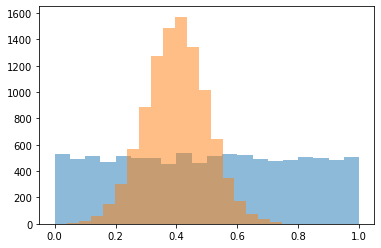

In [124]:
plt.hist(randx,bins=20,alpha=0.5)
plt.hist(randy,bins=20,alpha=0.5)

In [168]:
def scatter_hist(x, y, modely, randx, ax, ax_histx, ax_histy, targety=[]):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, labelleft=False)
    ax_histy.tick_params(axis="y", labelbottom=False, labelleft=False)
    ax_histx.get_yaxis().set_ticks([])
    ax_histy.get_xaxis().set_ticks([])
    
    # the scatter plot:
    ax.plot(x, y)
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.set_ylabel("Latent Space", fontsize=16)
    ax.set_xlabel("Materials Space", fontsize=16)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

    # now determine nice limits by hand:
    #binwidth = 0.25
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    #bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(modely, bins=20, alpha=0.5, density=True)
    if len(targety) > 0 :
        ax_histx.hist(targety, bins=20, alpha=0.5, density=True)
    ax_histy.hist(randx, bins=20, orientation='horizontal', alpha=0.5)
    


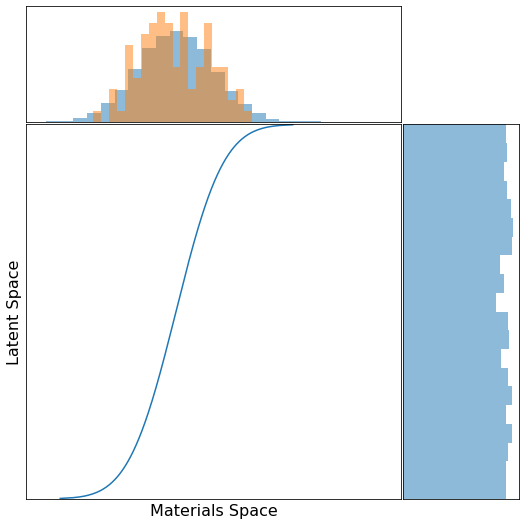

In [174]:
np.random.seed(19680801)

Ntarget = 100
Nmodel  = 10000
target_sig = 0.1
target_mu  = 0.4
model_sig  = 0.1
model_mu   = 0.4

modelx  = np.random.random(Nmodel)
modely  = Finv(modelx,sig=model_sig,mu=model_mu)
targetx  = np.random.random(Ntarget)
targety = Finv(targetx,sig=target_sig,mu=target_mu)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(Finv(x,sig=model_sig,mu=model_mu), x, modely, modelx, ax, ax_histx, ax_histy, targety=targety)

plt.savefig('inverse_trans_empirical_3.png',bbox_inches='tight')
plt.show()